In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Likelihood distribution
The likelihood becomes : 
$$\mathcal{P}_{li}(x) = \prod_{i=1}^{N} \prod_{j=1}^{M} \frac{1}{\sqrt(2\pi v_{li}^{2})} e^{-\frac{1}{2v_{li}^{2}}(d_{ij}-x_j)^2} \Rightarrow \boxed{\mathcal{P}_{li}(x) = \frac{1}{(2\pi v_{li}^{2})^{\frac{NM}{2}}} e^{-\frac{1}{2v_{li}^{2}}\sum_{j=1}^{N}\sum_{j=1}^{M} (d_{ij}-x_j)^2} = \frac{1}{Z_{li}} e^{-V(x)}}$$

with 
$$ \boxed{Z_{li} = (2\pi v_{li}^{2})^{\frac{NM}{2}}, \;\; \text{and} \;\; V(x) = \frac{1}{2v_{li}^{2}}\sum_{i=1}^{N}\sum_{j=1}^{M} (d_{ij}-x_j)^2} $$

$$ \nabla V(x) = \frac{1}{2v_{li}^{2}}\frac{\partial}{\partial x_k}\sum_{i=1}^{N} \sum_{j=1}^{M}(d_{ij}-x_j)^2, \;\; k \in \{1, \ldots, M \} \\ 
                \frac{1}{2v_{li}^{2}}\sum_{i=1}^{N} \sum_{j=1}^{M}\frac{\partial}{\partial x_k}(d_{ij}-x_j)^2 \\
                \frac{1}{2v_{li}^{2}}\sum_{i=1}^{N} \sum_{j=1}^{M}-2\frac{\partial x_j}{\partial x_k}(d_{ij}-x_j) \\
                \nabla V(x) =-\frac{1}{v_{li}^{2}}\sum_{i=1}^{N} \sum_{j=1}^{M}\delta_{jk}(d_{ij}-x_j), \;\; where \;\;  
        \delta_{jk}=\left\{
                \begin{array}{ll}
                  1 & if \; j=k \\
                  0 & if \; j \not = k
                \end{array}
              \right.\\
\boxed{\vec{\nabla} V(x) =-\frac{1}{v_{li}^{2}}\sum_{i=1}^{N}(d_{ik}-x_k)} $$

### Prior distribution
$X = \{x_1, x_2, \ldots, x_M \}$. The prior becomes 
$$\mathcal{P}_{pr}(x) = \prod_{j=1}^{M} \frac{1}{\sqrt(2\pi v_{pr}^2)} e^{-\frac{1}{2v_{pr}^2}x_j^2} \Rightarrow \boxed{\mathcal{P}_{pr}(x)  = \frac{1}{(2\pi v_{pr}^2)^{\frac{M}{2}}} e^{-\frac{1}{2v_{pr}^2}\sum_{j=1}^{M} x_j^2} = \frac{1}{Z_{pr}} e^{-U(x)}}$$

with 
$$ \boxed{Z_{pr} = (2\pi v_{pr}^2)^{\frac{M}{2}}, \;\; \text{and} \;\; U(x) =  \frac{1}{2v_{pr}^2}\sum_{j=1}^{M} x_j^2 }$$

So, we have : 
$$ \nabla U(x) = \frac{1}{2v_{pr}^{2}}\frac{\partial}{\partial x_k}\sum_{j=1}^{M} x_j^2, \;\; k \in \{1, \ldots, M \} \\
                 \frac{1}{2v_{pr}^{2}}\sum_{j=1}^{M} \frac{\partial}{\partial x_k}x_j^2 \\
                 \frac{1}{v_{pr}^{2}}\sum_{j=1}^{M} \frac{\partial}{\partial x_k}x_j = \frac{1}{v_{pr}^{2}}\sum_{j=1}^{M}\delta_{kj}x_j \\
                 \boxed{\vec{\nabla} U(x) = \frac{1}{v_{pr}^{2}}x_k } \\ $$

### Stochastic process
$$ f(x,t) = -\beta(t) \vec{\nabla} V(x) - \vec{\nabla} U(x) \\
   f(x,t) = -\beta(t)\frac{1}{2v^{'2}}\frac{\partial}{\partial x_k}\sum_{i=1}^{N} \sum_{j=1}^{M}(d_{ij}-x_j)^2 - \frac{1}{2v^2}\frac{\partial}{\partial x_k}\sum_{j=1}^{M} x_j^2 \\
   \boxed{f(x,t) = \beta(t)\frac{1}{v_{li}^{2}}\sum_{i=1}^{N}(d_{ik}-x_k) - \frac{1}{v_{pr}^{2}}x_k} $$

$$ \boxed{x_{n+1,k} = x_{n,k} + \sigma Y_1 \sqrt(h) +f(x_{n,k},t)h, \;\; \text{and} \;\; x_1=x_0} $$

$$ q(d) = \int \mathcal{P}_{li}(d|X).\mathcal{P}_{pr}(X) dX $$ \\
        $$ \int \prod_{i=1}^{M}dx_j \left( (2\pi v_l^2)^{\frac{-NM}{2}} e^{-\frac{1}{2v_l^2} \sum_{i=1}^{N} \sum_{j=1}^{M}(d_{ij} - x_j)^2} . (2\pi v_p^2)^{\frac{-M}{2}} e^{-\frac{1}{2v_p^2} \sum_{j=1}^{M} x_j^2} \right) 
        \\
        \prod_{i=1}^{M} (2\pi v_l^2)^{\frac{-N}{2}}.(2\pi v_p^2)^{\frac{-1}{2}} \int dx_j \left(e^{-\frac{1}{2v_l^2} \sum_{i=1}^{N}(d_{ij} - x_j)^2 - \frac{x_j^2}{2v_p^2}} \right)
        \\
        \prod_{i=1}^{M} (2\pi v_l^2)^{\frac{-N}{2}}.(2\pi v_p^2)^{\frac{-1}{2}} \int dx_j \left(e^{-\frac{1}{2v_l^2} \sum_{i=1}^{N}(d_{ij}^2 - 2d_{ij}x_j + x_j^2) - \frac{x_j^2}{2v_p^2}} \right)
        \\
        \prod_{i=1}^{M} (2\pi v_l^2)^{\frac{-N}{2}}.(2\pi v_p^2)^{\frac{-1}{2}} \int dx_j \left(e^{-\frac{1}{2v_l^2} \sum_{i=1}^{N}d_{ij}^2 +\frac{1}{v_l^2}\sum_{i=1}^{N} d_{ij}x_j -\frac{1}{2v_l^2} \sum_{i=1}^{N}x_j^2 - \frac{x_j^2}{2v_p^2}} \right) 
        \\
        \prod_{i=1}^{M} (2\pi v_l^2)^{\frac{-N}{2}}.(2\pi v_p^2)^{\frac{-1}{2}} \int dx_j \left(e^{-\frac{1}{2v_l^2} \sum_{i=1}^{N}d_{ij}^2 +\frac{1}{v_l^2}\sum_{i=1}^{N} d_{ij}x_j -\frac{N}{2v_l^2}x_j^2 - \frac{x_j^2}{2v_p^2}} \right)
        \\
        \prod_{i=1}^{M} (2\pi v_l^2)^{\frac{-N}{2}}.(2\pi v_p^2)^{\frac{-1}{2}} \int dx_j \left(e^{-\left(\frac{N}{2v_l^2} + \frac{1}{2v_p^2}\right)x_j^2 +\frac{x_j}{v_l^2}\sum_{i=1}^{N} d_{ij} -\frac{1}{2v_l^2} \sum_{i=1}^{N}d_{ij}^2 } \right)
        \\
        \prod_{i=1}^{M} (2\pi v_l^2)^{\frac{-N}{2}}.(2\pi v_p^2)^{\frac{-1}{2}} \int dx_j \left(e^{-\left(\frac{N}{2v_l^2} + \frac{1}{2v_p^2}\right)x_j^2 +\frac{\sum_{i=1}^{N} d_{ij}}{v_l^2}x_j -\frac{\sum_{i=1}^{N}d_{ij}^2}{2v_l^2}} \right)
        \\
        A_j \int dx_j e^{(-ax_j^2 + bx_j + c)} = A_j. \sqrt(\frac{\pi}{a})e^{\frac{b^2}{4a}+c}
         $$ 
With : 

$$ \begin{align*}
 A_j  &= \prod_{i=1}^{M} \frac{1}{(2\pi v_l^2)^{\frac{N}{2}}.(2\pi v_p^2)^{\frac{1}{2}}} &  b = \frac{\sum_{i=1}^{N} d_{ij}}{v_l^2} \\
 a    &=  \left(\frac{N}{2v_l^2} + \frac{1}{2v_p^2}\right)                              &  c = -\frac{\sum_{i=1}^{N}d_{ij}^2}{2v_l^2}
\end{align*} $$

In [3]:
def SDE_5(time, time_step, observe_data, N_traj, N_step, N_param, N_dataPt, v_li, v_pr):
    T  = time
    d  = observe_data
    h  = time_step    
    Nt = N_traj
    Np = N_param
    Nd = N_dataPt
    
    vl = v_li                                                             # std likelihood
    vp = v_pr                                                             # std prior
    
    X    = np.random.normal(loc=0, scale=vp, size=(Nt, Np)) 
    Y1   = np.random.randn(Nt, Np, N_step) 
    tvec = np.linspace(0,T, N_step)
    
    Xsol = np.zeros((Nt, Np, N_step))  
    
    for k in range(N_step):
        t     = tvec[k]
        
        V_dot = (1/(vl^2))*(d[np.newaxis,:,:]-X[:,np.newaxis,:]).sum(1)  # V_dot.shape = (Nt,Nd,Np).sum(1)
        U_dot = (1/(vp^2))*X
        
        f           = (t/T)*V_dot - U_dot        
        X           = X + Y1[:,:,k]*sqrt(2*h) + h*f 
        Xsol[:,:,k] = X
        
    # R(X)
    ln_Zli = ((Nd*Np)/2)*ln(2*pi*(vl)^2)
    V      = ((d[np.newaxis,:,:,np.newaxis]-Xsol[:,np.newaxis,:,:])^2).sum(1)
    V      = V.sum(1)
    
    g      = (1/T)*(1/(2*((vl)^2)))*V
    R      = np.trapz(g, tvec) + float(ln_Zli)
    exp_R  = np.exp(-R)
    mod_ev = float(np.mean(exp_R))
    
    # plot
    j            = 0
    data_pt_vect = []
    mod_ev_vect  = []
    dataPt_modEv = []
    
    while j < Nt :
        j     += 20 
        R_vec  = exp_R[:j]
        R_mean = float(np.mean(R_vec))
        
        data_pt_vect.append(j)
        mod_ev_vect.append(R_mean)
        dataPt_modEv.append((j, R_mean))       
        
    sol = [data_pt_vect, mod_ev_vect, dataPt_modEv, Xsol, mod_ev]
    print(j)
    return sol

In [4]:
n_param      = 1                                                     # number of parameters
n_traj       = 5000                                                     # number of trajectories
n_data_pt    = 2                                                    # number of data point d=(d_1, ..., d_N)
obs_data     = np.random.randn(n_data_pt, n_param)                     # observed data
time         = 2.0                                                    # duration of process
time_step    = 0.01
var_li       = 1.0
var_pr       = 1.0
       
N_step = int(time/time_step)                                          # number of step
Sol = SDE_5(time, time_step, obs_data, n_traj, N_step, n_param, n_data_pt, var_li, var_pr)
print('Xsol', Sol[3].shape)
print('Model evidence : ', Sol[4])

5000
('Xsol', (5000, 1, 200))
('Model evidence : ', 0.08756537022363625)


In [5]:
vl = var_li
vp = var_pr
N  = n_data_pt
M  = n_param 

d  = obs_data

A = (1/(((2*pi*vl^2)^(N/2)) * (2*pi*vp^2)^(1/2)))
B = sqrt((2*pi*(vl^2)*(vp^2))/(N*(vp^2)+(vl^2)))
C = 1/(2*(vl^2))
D = ((vp^2)/(N*(vp^2)+(vl^2)))
q = 1
for j in range(M):
    q = q* A*B*exp(C*D*(((d[:,j]).sum())^2 - ((d[:,j])^2).sum()))

exact_mod_ev = q
print("Model evidence ", float(exact_mod_ev))  

('Model evidence ', 0.0957573606249051)


In [6]:
# estimation error
error = np.abs(exact_mod_ev-np.array(Sol[1]))

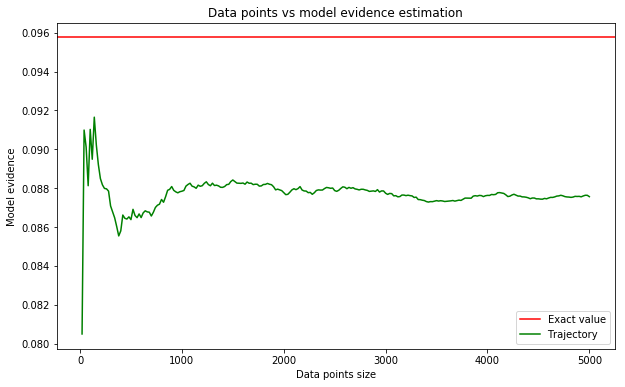

In [7]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange
plt.figure(figsize=(10,6))
plt.axhline(y=exact_mod_ev, linestyle='-', color='r', label="Exact value") 
plt.plot(Sol[0], Sol[1], color='g', label="Trajectory") 
plt.xlabel("Data points size")
plt.ylabel("Model evidence")
plt.title("Data points vs model evidence estimation")
plt.legend()
plt.show()

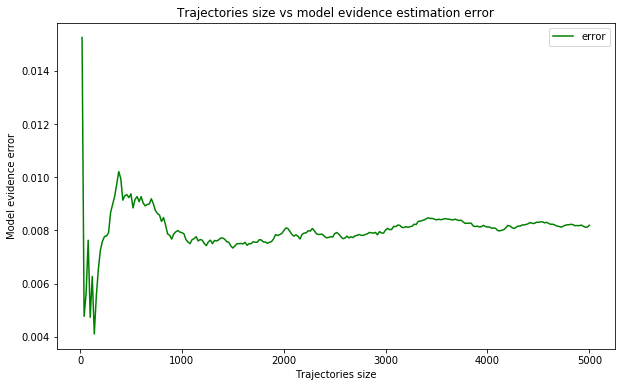

In [8]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange
plt.figure(figsize=(10,6))
plt.plot(Sol[0], error, color='g', label="error") 
plt.xlabel("Trajectories size")
plt.ylabel("Model evidence error")
plt.title("Trajectories size vs model evidence estimation error")
plt.legend()
plt.show()